<a href="https://colab.research.google.com/github/SEsoNDos/Graduation-Project-MLSC/blob/main/Graduation_Project_MLSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting Hazardous NEOs (Nearest Earth Objects)**





In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn imbalanced-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



1. Data Importing and Cleaning

In [ ]:
#Load the dataset
NearestEarth="/content/drive/MyDrive/Colab Notebooks/nearest-earth-objects(1910-2024).csv"
NE = pd.read_csv(NearestEarth)

In [ ]:
# Display the first few rows of the dataset
print(NE.head())
#Get basic information about the dataset
print(NE.info())
# Get statistical summary of the dataset
print(NE.describe())


    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         Fals

In [ ]:
#Check for missing values
print(NE.isnull().sum())

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64


In [ ]:
#Handle missing values by filling them with the mean of the column
numeric_NE = NE.select_dtypes(include=np.number)

NE[numeric_NE.columns] = NE[numeric_NE.columns].fillna(numeric_NE.mean())

In [ ]:
#Remove duplicate rows
NE.drop_duplicates(inplace=True)


2. Exploratory Data Analysis (EDA):

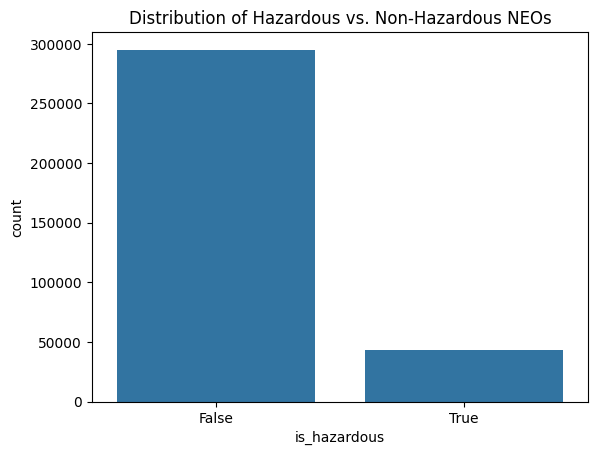

In [ ]:
#Visualize the distribution of the target variable
sns.countplot(x="is_hazardous", data=NE)
plt.title("Distribution of Hazardous vs. Non-Hazardous NEOs")
plt.show()


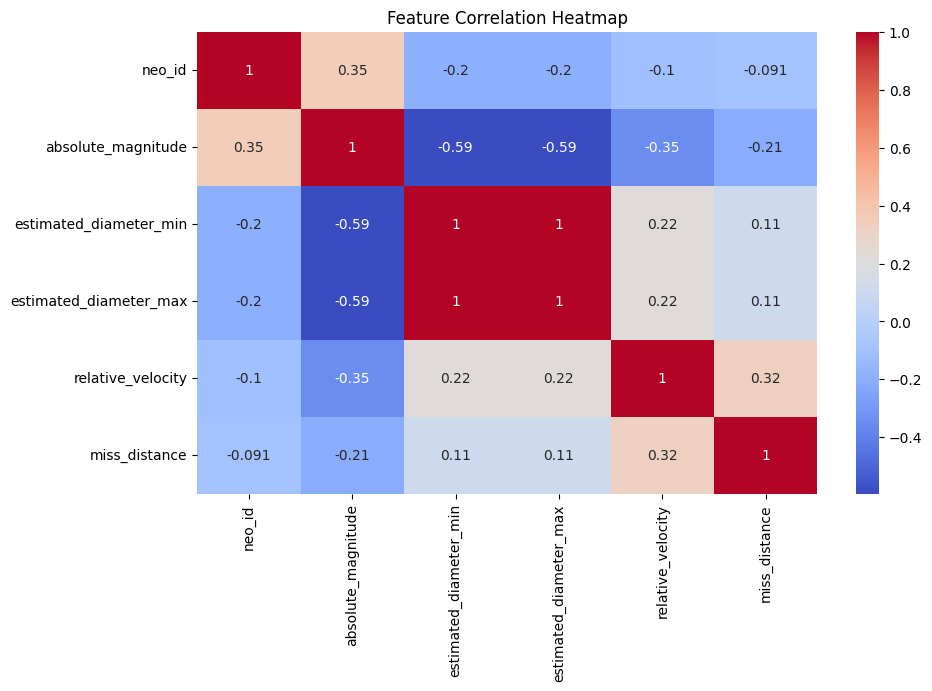

In [ ]:
# Visualize the correlation between numerical features
plt.figure(figsize=(10, 6))
numeric_NE = NE.select_dtypes(include=np.number)
sns.heatmap(numeric_NE.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

3. Data Preprocessing

In [ ]:
#Select features and target variable
features = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max",
            "relative_velocity", "miss_distance", "orbiting_body"]

X = NE[features]

y = NE["is_hazardous"]

print(X.head())
print(y.head())


   absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0               19.14                0.394962                0.883161   
1               18.50                0.530341                1.185878   
2               21.45                0.136319                0.304818   
3               20.63                0.198863                0.444672   
4               22.70                0.076658                0.171412   

   relative_velocity  miss_distance orbiting_body  
0       71745.401048   5.814362e+07         Earth  
1      109949.757148   5.580105e+07         Earth  
2       24865.506798   6.720689e+07         Earth  
3       78890.076805   3.039644e+07         Earth  
4       56036.519484   6.311863e+07         Earth  
0    False
1     True
2    False
3    False
4    False
Name: is_hazardous, dtype: bool


In [ ]:
#Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=["orbiting_body"], drop_first=True)

Split Data into Training and Testing Sets

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Oversampling Technique using SMOTE

In [ ]:
#Handle imbalanced classes using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
#Display the shapes of the resampled datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (472058, 5)
X_test shape: (67640, 5)
y_train shape: (472058,)
y_test shape: (67640,)


Undersampling Technique

In [ ]:

undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

In [ ]:
#Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
#Evaluate the model using classification report, confusion matrix, and AUC-ROC score
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.95      0.95      0.95     59008
        True       0.68      0.65      0.67      8632

    accuracy                           0.92     67640
   macro avg       0.81      0.80      0.81     67640
weighted avg       0.92      0.92      0.92     67640

Confusion Matrix:
 [[56329  2679]
 [ 2980  5652]]
AUC-ROC Score: 0.8046861571306081


----- Random Forest Evaluation -----
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     59008
        True       0.68      0.65      0.67      8632

    accuracy                           0.92     67640
   macro avg       0.81      0.80      0.81     67640
weighted avg       0.92      0.92      0.92     67640

Confusion Matrix:
 [[56329  2679]
 [ 2980  5652]]
AUC-ROC Score: 0.8046861571306081


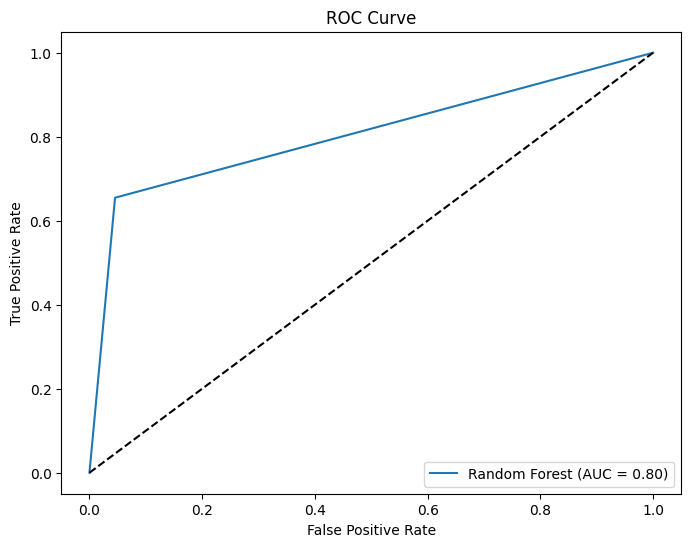

In [ ]:
#Define a function to evaluate the model and plot the ROC curve
def evaluate_model(y_true, y_pred, model_name):
    print(f"----- {model_name} Evaluation -----")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_true, y_pred))

    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

rf_predictions = model.predict(X_test)

evaluate_model(y_test, rf_predictions, "Random Forest")



#*SEng.soNDos Sofian*
#MLSC Data Science & Machine Learning Course Batch 2
#Tuesday
#18'2'2025



  










